In [54]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [55]:
'''
'load_breast_cancer()' contains a total of 30 features (input variables or attributes)
which are characteristics of the tumors - such as mean radius, mean texture etcetera.
we are loading all the features in a pandas DataFrame named df.
'''

df = pd.DataFrame(data=load_breast_cancer()['data'], columns = load_breast_cancer()['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
# this df will be the features set for our analysis to classify wether a new tumor would be Benign or Malignant.

from sklearn.model_selection import train_test_split
X = df.copy()
Y = load_breast_cancer()['target'] # the target variable in the dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [57]:
# we will fit 3 classification algorithms here - Decision Tree, KNN and Naive Bayes.
# and then compare the performence of all three of them to judge which one fits better for this analysis.

In [58]:
# Let's start with Decision tree

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

# Training the Decision Tree model on the training data
dt_train = dt.fit(X_train, Y_train)

# Making predictions on the test data
Y_pred = dt.predict(X_test)

In [59]:
# checking the performance of our model
    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy*100)
print("Precision:",precision*100)
print("Recall:",recall*100)
print("F1-Score:",f1*100)

'''
Recall is more important here since the cost of False negative 
(Model predicting Benign when in reality the tumor is malignant) is very high in this case.

'''

Accuracy: 90.05847953216374
Precision: 96.90721649484536
Recall: 87.03703703703704
F1-Score: 91.70731707317073


'\nRecall is more important here since the cost of False negative \n(Model predicting Benign when in reality the tumor is malignant) is very high in this case.\n\n'

In [60]:
# now we will perform Cross validation here and check the performance metrics again to be more sure about the fit of the model

from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(dt, X, Y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(dt, X, Y, cv=5, scoring='precision')
cv_recall = cross_val_score(dt, X, Y, cv=5, scoring='recall')
cv_f1 = cross_val_score(dt, X, Y, cv=5, scoring='f1')

print("CV_Accuracy:", cv_accuracy.mean()*100)
print("CV_Precision:",cv_precision.mean()*100)
print("CV_Recall:",cv_recall.mean()*100)
print("CV_F1-Score:",cv_f1.mean()*100)

# our recall value increases even further here so that is a good thing.

CV_Accuracy: 92.61605340785593
CV_Precision: 94.63211117315758
CV_Recall: 92.69170579029733
CV_F1-Score: 93.70788874080512


In [61]:
# Now when the tree is allowed to grow fully, the maximum depth of the tree is given by 

dt.tree_.max_depth

7

In [62]:
# we Will now tune the hyperparameters using the GridSearch-CV method.

from sklearn.model_selection import GridSearchCV

# Defining the possible values of the hyperparameters 

hyperparameters = {'criterion': ['gini','entropy'],'max_depth': [None,5,10,15,20],'min_samples_split': [2,5,10],'min_samples_leaf': [1,2,4,6]}

In [63]:
# creating the grid search cv object with a 5 fold cross-validation.

grid_search = GridSearchCV(estimator=dt, param_grid=hyperparameters, cv=5, scoring='recall')
grid_search.fit(X_train,Y_train) # fitting the object on your training dataset.

tuned_hyp = grid_search.best_params_ #the best set of hyperparameters based upon the recall metric.
tuned_hyp

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [64]:
# fitting the decision tree with these best tuned hyperparameters

best_dt = DecisionTreeClassifier(random_state=0, **tuned_hyp)
best_dt.fit(X_train,Y_train)

# making the predictions
Y_pred_best = best_dt.predict(X_test)

In [65]:
# checking the performance

accuracy_best = accuracy_score(Y_test, Y_pred_best)
precision_best = precision_score(Y_test, Y_pred_best)
recall_best = recall_score(Y_test, Y_pred_best)
f1_best = f1_score(Y_test, Y_pred_best)

print("Accuracy:", accuracy_best*100)
print("Precision:",precision_best*100)
print("Recall:",recall_best*100)
print("F1-Score:",f1_best*100)

# we can see none of the metrics increase much once we tune the hyperparameters.
# so we can ignore tuning the hyperparameters in this case.

Accuracy: 93.56725146198829
Precision: 97.0873786407767
Recall: 92.5925925925926
F1-Score: 94.7867298578199


In [66]:
# we can further check for the important features to avoid features which are not important for the model

best_dt.feature_importances_

array([0.        , 0.01798906, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00527564, 0.01902689, 0.        ,
       0.        , 0.        , 0.        , 0.0497759 , 0.00145851,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10094535, 0.        ,
       0.        , 0.02742196, 0.7631158 , 0.01499088, 0.        ])

In [67]:
feature_importance = best_dt.feature_importances_

In [68]:
important_features = [feature for feature, importance in enumerate(feature_importance) if importance > 0]
important_features

[1, 7, 8, 13, 14, 23, 26, 27, 28]

In [69]:
feature_names_imp = [df.columns[i] for i in important_features]
feature_names_imp

['mean texture',
 'mean concave points',
 'mean symmetry',
 'area error',
 'smoothness error',
 'worst area',
 'worst concavity',
 'worst concave points',
 'worst symmetry']

In [70]:
# creating new training and test set out of the important features only.

X_train_important = X_train.loc[:, feature_names_imp]
X_test_important = X_test.loc[:, feature_names_imp]

In [71]:
# fitting the tuned decision tree on this new training set - 

best_dt.fit(X_train_important, Y_train)

# making the predictions 

Y_pred_important = best_dt.predict(X_test_important)

In [72]:
# Calculating performance metrics for the model with important features

accuracy_important = accuracy_score(Y_test, Y_pred_important)
precision_important = precision_score(Y_test, Y_pred_important)
recall_important = recall_score(Y_test, Y_pred_important)
f1_important = f1_score(Y_test, Y_pred_important)

print("Accuracy with Important Features:", accuracy_important*100)
print("Precision with Important Features:", precision_important*100)
print("Recall with Important Features:", recall_important*100)
print("F1 Score with Important Features:", f1_important*100)

Accuracy with Important Features: 93.56725146198829
Precision with Important Features: 97.0873786407767
Recall with Important Features: 92.5925925925926
F1 Score with Important Features: 94.7867298578199


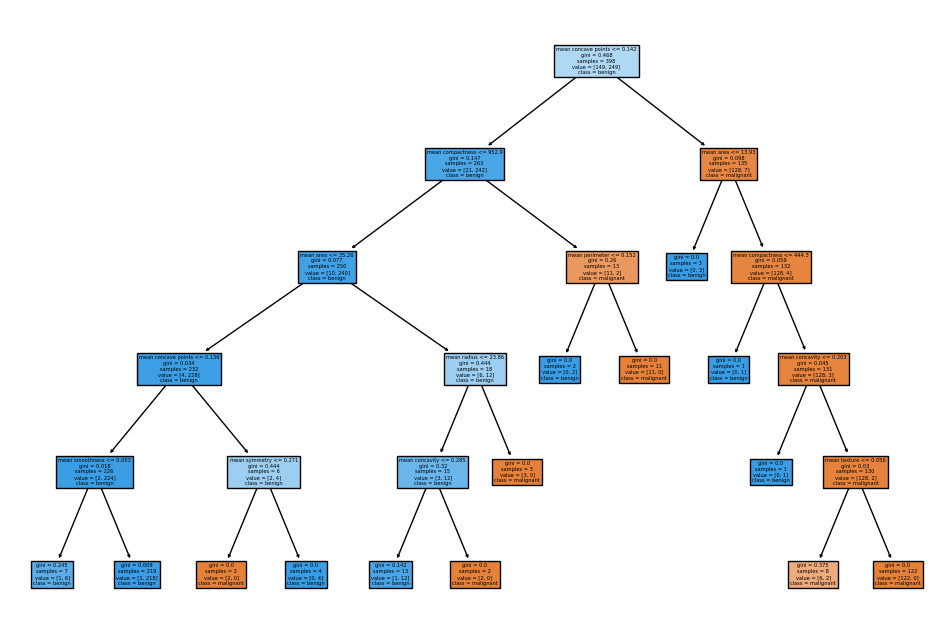

In [73]:
# Visualize the Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt, filled=True, feature_names=load_breast_cancer()['feature_names'], class_names=["malignant", "benign"])
plt.show()

although recall and accuracy has increased slightly compared to the initial model, the change is not very significant.
we can therefore keep the original Decision tree as the best fit tree for this dataset.

Now we will apply the K-NN algorithm on the same datase to assess the performance of thaat algorith and see if it is a better model than the Decision Tree.

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Splitting the data into a training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [76]:
# Creating a KNN classifier

knn = KNeighborsClassifier() 

In [82]:
# Performing k-fold cross-validation for each k value to find the optimal value of k

k_accuracy = {}
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5, scoring='recall')
    k_accuracy[k] = scores.mean()
    
# finding the best value of k --
best_k = max(k_accuracy, key=k_accuracy.get)
print(best_k,':',k_accuracy[best_k])

17 : 0.9691705790297339


In [84]:
# we will run the model with the k value as 17

knn_best = KNeighborsClassifier(n_neighbors=17)

In [85]:
# Fitting the KNN classifier on the training data
knn_best.fit(X_train, Y_train)

# Making predictions on the test data
Y_pred = knn_best.predict(X_test)

In [86]:
# Calculating metrics for the test data

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy*100)
print("Precision:",precision*100)
print("Recall:",recall*100)
print("F1-Score:",f1*100)

# the recall value is very good. 

Accuracy: 96.49122807017544
Precision: 96.36363636363636
Recall: 98.14814814814815
F1-Score: 97.24770642201834


In [87]:
# checking with a 5-fold cross validation -

cv_accuracy = cross_val_score(knn_best, X, Y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(knn_best, X, Y, cv=5, scoring='precision')
cv_recall = cross_val_score(knn_best, X, Y, cv=5, scoring='recall')
cv_f1 = cross_val_score(knn_best, X, Y, cv=5, scoring='f1')

print("CV_Accuracy:", cv_accuracy.mean()*100)
print("CV_Precision:",cv_precision.mean()*100)
print("CV_Recall:",cv_recall.mean()*100)
print("CV_F1-Score:",cv_f1.mean()*100)

# however, with cross validation, the recall reduces slightly but nonetheless, the performance is quite high.

CV_Accuracy: 92.97469337059464
CV_Precision: 92.50562319326276
CV_Recall: 96.9170579029734
CV_F1-Score: 94.5937423332443


The recall score of the KNN approach is higher than that of the Decision tree (with the important features).
KNN seems to be a better fit model in this case

finally, we will check the performance of The Naive Bayes approach

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
# Splitting the data into a training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [96]:
# Creating a Naive Bayes classifier (GaussianNB since the features are continuous)

nb = GaussianNB()

In [97]:
# Training the Naive Bayes model on the training data
nb.fit(X_train, Y_train)

# Making predictions on the test data
y_pred = nb.predict(X_test)

In [98]:
# Calculating metrics for the test set

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy*100)
print("Precision:",precision*100)
print("Recall:",recall*100)
print("F1-Score:",f1*100)

# the recall value is even better than the KNN approach

Accuracy: 96.49122807017544
Precision: 96.36363636363636
Recall: 98.14814814814815
F1-Score: 97.24770642201834


In [99]:
# checking with a 5-fold cross validation -

cv_accuracy = cross_val_score(nb, X, Y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(nb, X, Y, cv=5, scoring='precision')
cv_recall = cross_val_score(nb, X, Y, cv=5, scoring='recall')
cv_f1 = cross_val_score(nb, X, Y, cv=5, scoring='f1')

print("CV_Accuracy:", cv_accuracy.mean()*100)
print("CV_Precision:",cv_precision.mean()*100)
print("CV_Recall:",cv_recall.mean()*100)
print("CV_F1-Score:",cv_f1.mean()*100)

# however, with cross validation, the recall score happens to be almost equal to that of KNN.

CV_Accuracy: 93.85188635305074
CV_Precision: 93.57565691776217
CV_Recall: 96.91314553990613
CV_F1-Score: 95.1833212457133


We can conclude that, for performing classification technique on the Breast Cancer Dataset, the best approach would be to either go with a KNN algorithm with the number of nearest neighbors to be 17 or to perform a Naive Bayes algorithm instead of a decision tree.

However, for future considerations, it's worth exploring the performance of ensemble learning algorithms to determine if they outperform the supervised learning algorithms we've examined so far.